# Predicting Whether a patient has diabetes or not

In [57]:
# Importing Libraries

import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt

sns.set()

# from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
# Read of csv dataset

diabetes_df = pd.read_csv("C:/Users/Platini/Desktop/Dataset/Merit_Internship/Project 2 - Diabetes Data/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [59]:
# Columns in the dataset

diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
# Information about the dataset

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
# Knowing about the dataset

diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
# Transpose of the describe data

diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [63]:
# Checking if the dataset have null value or not

diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [64]:
# checking the number of null values our dataset has

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
# Replacing of 0 value with NAN value

diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


# Showing the count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


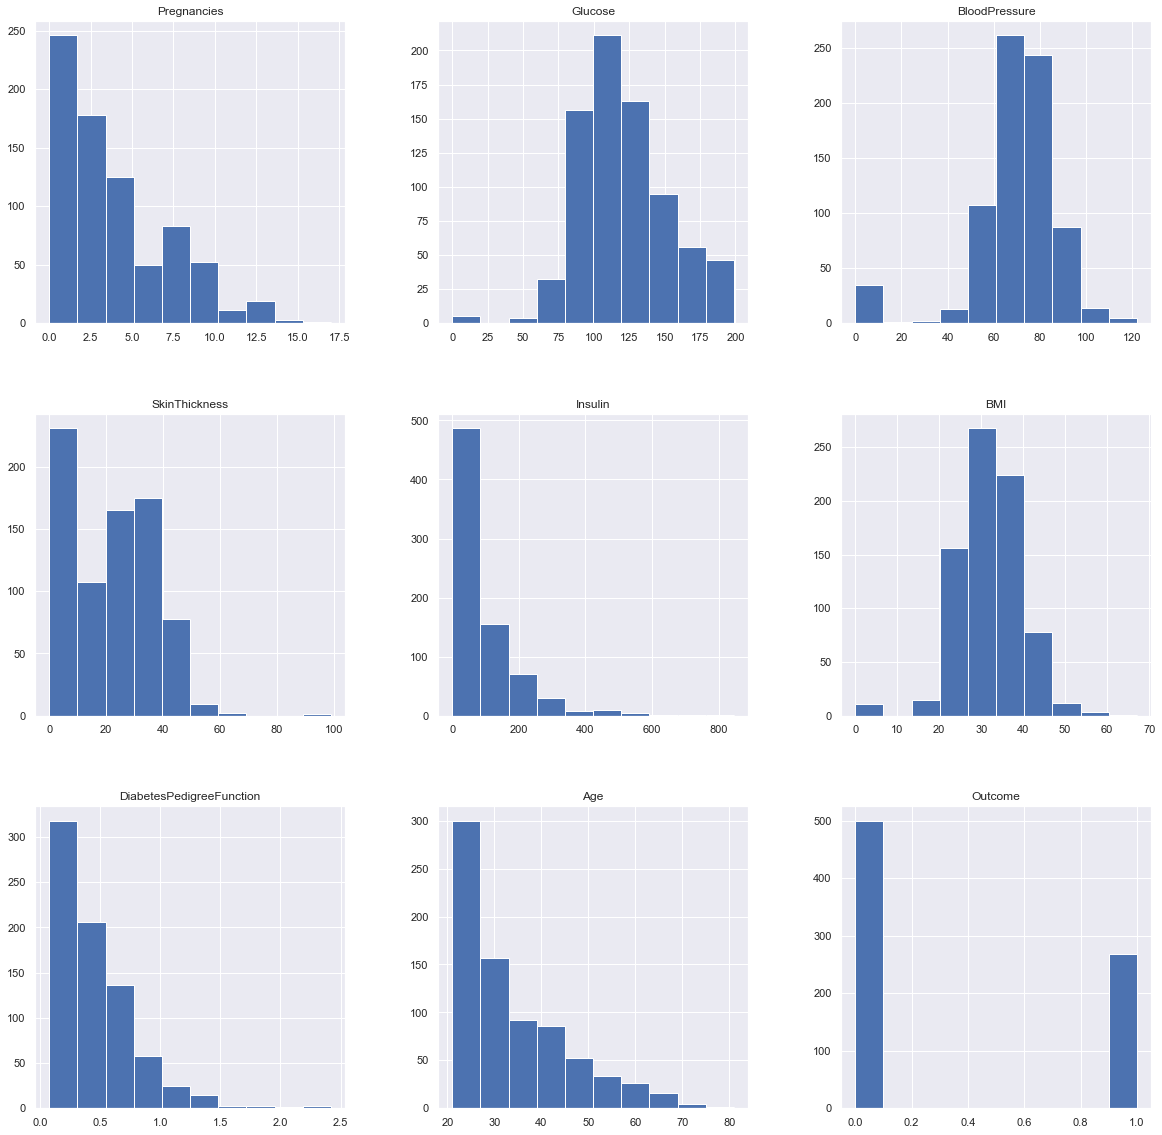

In [66]:
# Data Visulization
# plotting the data distribution plots before removing null values

p = diabetes_df.hist(figsize = (20, 20))

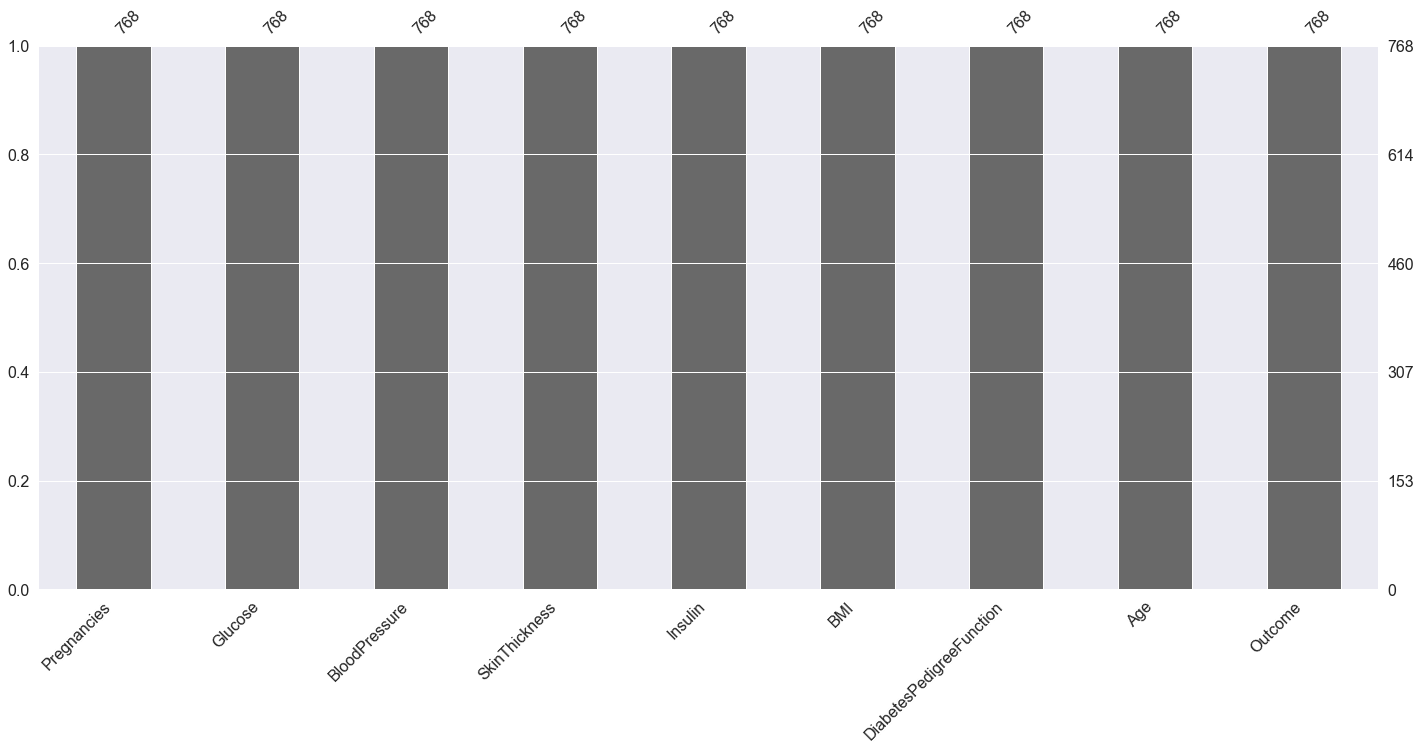

In [67]:
# Plotting Null Count Analysis Plot

p = msno.bar(diabetes_df)

### Inference : From the above graph we can see clearly that there are no null values in the dataset

0    500
1    268
Name: Outcome, dtype: int64


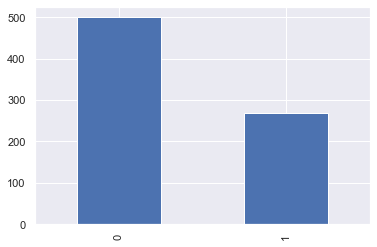

In [68]:
# Checking how our outcome column is balanced

color_wheel = {1: "#0392cf", 2: "7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind="bar")

#### Inference: Here from the above visualization, it is clearly visible that our dataset is completely imbalanced, in fact the number of patients who are diabetic is half of the patients who are non-diabetic

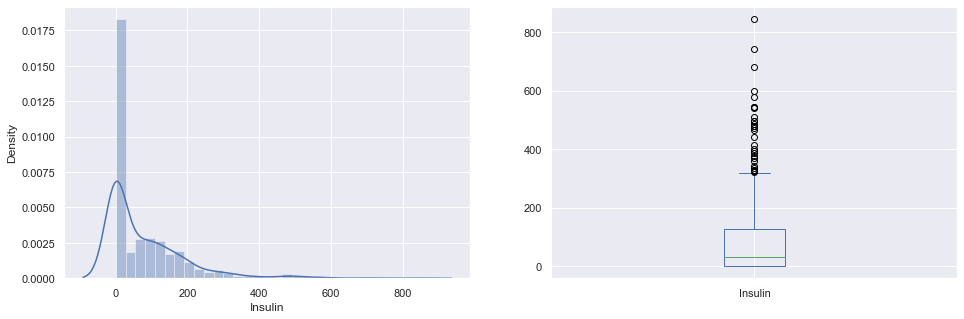

In [69]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

#### Inference: Displot is helpful in the distribution of data as well as the boxplot, it help see the outliers in that column and other information

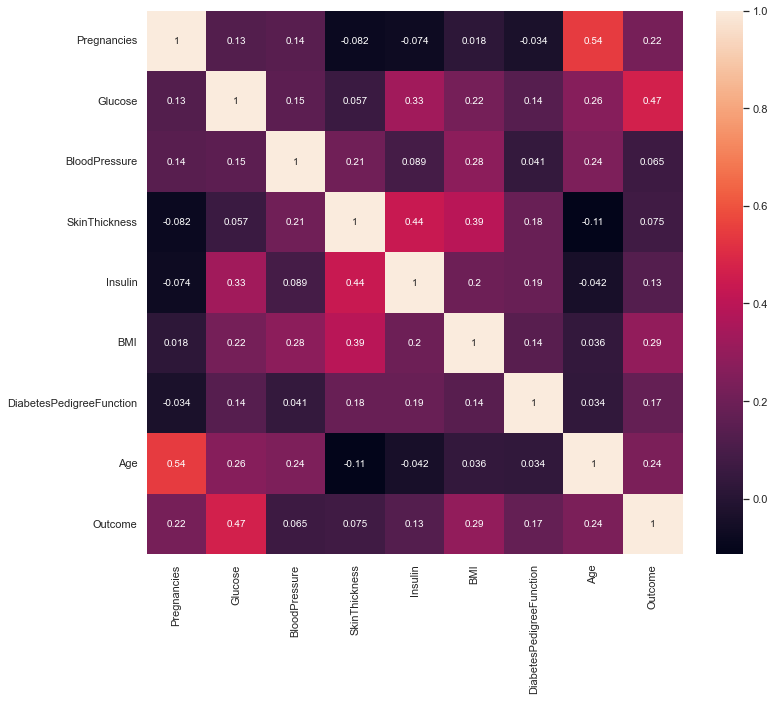

In [70]:
# Correlation bettween all features
# Before cleaning

plt.figure(figsize=(12,10))

# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True)

In [71]:
# Scaling the Data

diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [72]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


## Model Building

In [73]:
# Splitting the dataset

x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)

In [75]:
# Random Forest
# Building the model using Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [76]:
# checking accuracy of the model on the training datasset

rfc_train = rfc.predict(x_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


#### The training dataset, our model is overfitted

In [77]:
# Getting the accuracy score for Random forest

from sklearn import metrics

predictions = rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7755905511811023


In [78]:
# Classification report and confusion matrix of random forest model

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[135  27]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       162
           1       0.70      0.67      0.69        92

    accuracy                           0.78       254
   macro avg       0.76      0.75      0.76       254
weighted avg       0.77      0.78      0.77       254



### Decision Tree
#### Building the model using DecisionTree

In [79]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
# Getting the accuracy score for Decision tree

from sklearn import metrics

dtree_pred = dtree.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, dtree_pred)))

Accuracy_Score = 0.7047244094488189


In [81]:
# Classification report and confusion matrix of Decision tree model

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[128  34]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       162
           1       0.60      0.55      0.58        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



### XgBoost Classifier
#### Building model using XGBoost

In [82]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [83]:
# Getting the accuracy score for XgBoost classifier

from sklearn import metrics

xgb_pred = xgb_model.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

NameError: name 'xgb_model' is not defined

In [84]:
# Classification report and confusion matrix of XgBoost classifier model

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

NameError: name 'xgb_pred' is not defined

### Support Vector Machine (SVM)
#### Building the model using Support Vector Machine (SVM)

In [85]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [86]:
# Predicting from support vector machine model on the testing data

svc_pred = svc_model.predict(x_test)

In [87]:
# Accuracy score for SVM

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy_Score = 0.7480314960629921


In [88]:
# Classification report and confusion matrix of Support Vector Machine model

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



### The conclusion from Model Building

#### Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.77


In [89]:
# Getting feature Importance

rfc.feature_importances_

array([0.08063953, 0.24376088, 0.08873633, 0.07601266, 0.07235394,
       0.16791683, 0.13408006, 0.13649977])

<AxesSubplot:>

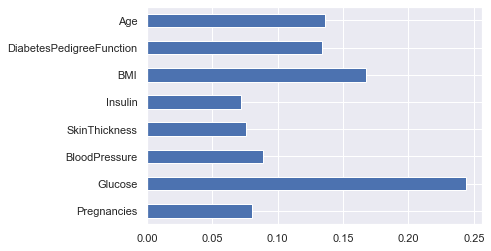

In [90]:
# Plotting feature importance

(pd.Series(rfc.feature_importances_, index=x.columns).plot(kind='barh'))

#### From the graph, it shows clearly that Glucose as a feature is the most important in this dataset

## Saving Model - Random forest

In [91]:
import pickle

# we will be using dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# loading the saved model
rfc_from_pickle = pickle.loads(saved_model)

# After loading the model, we use it for prediction
rfc_from_pickle.predict(x_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [92]:
# taking data from head and tail data to test our model is good enough to give right prediction

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Putting data points in the model will either return 0 or 1 ie showing patient suffering from diabetes or not

In [94]:
rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.288, 33]])   # 4th patient

array([1], dtype=int64)

In [95]:
rfc.predict([[1, 126, 60, 0, 0, 30.1, 0.349, 47]])   # 766th patient

array([1], dtype=int64)

In [96]:
rfc.predict([[1, 93, 70, 31, 0, 30.4, 0.315, 23]])   # 767th patient

array([0], dtype=int64)

### Conclusion

###### After using these patients records, we are able to build a machine learning model (random forest - best fit) to accurately predict whether or not the patients in the dataset have diabetes or not, along with that we were able to draw some insights from the data via data analysis and visualization.